In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
from pycbc.types import TimeSeries
from calcwf import gen_wf, shifted_e

/home/ben.patterson/.conda/envs/igwn_eccentric/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ben.patterson/.conda/envs/igwn_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


In [2]:
# Load in seobnrpe waveform
raw_wf_data = np.loadtxt('data/seobnrpe_waveform.txt', delimiter=',').T

# Find start time
dt = np.mean(np.diff(raw_wf_data[0]))
current_start_ind = np.max(np.where(raw_wf_data[1] == 0))+1
start_time = dt*(-len(raw_wf_data[0])+current_start_ind)

# Create pycbc timeseries object and roll to correct start point
wf = TimeSeries(raw_wf_data[1]-1j*raw_wf_data[2], dt, epoch=start_time)
wf.roll(-current_start_ind)

# Interpolate to 1024 Hz
wf_interp = interp1d(wf.sample_times, wf)
wf_times = np.linspace(*wf.sample_times[[0,-1]], round(wf.duration)*1024, endpoint=False)
wf_strain = wf_interp(wf_times)
wf = TimeSeries(wf_strain, 1/1024, wf_times[0])

In [3]:
# Perform qtransform
wf_q_times, wf_q_freqs, wf_q_plane = wf.real().qtransform(1/512, logfsteps=300, qrange=(50,50), frange=(10, 50))
wf_q_amp = wf_q_plane**0.5

# Normalise amplitude at each freq
wf_q_amp = (wf_q_amp.T / np.max(wf_q_amp, axis=1)).T

Text(0, 0.5, 'Frequency / Hz')

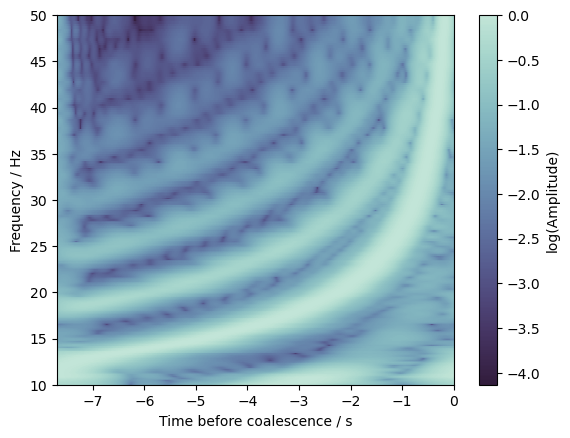

In [4]:
# Make qtransform plot
cmap = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
plt.pcolormesh(wf_q_times, wf_q_freqs, np.log10(wf_q_amp), cmap=cmap)
plt.colorbar(label='log(Amplitude)')

# Plot formatting
plt.ylim(10,50)
plt.xlim(wf.sample_times[0], 0)
plt.xlabel('Time before coalescence / s')
plt.ylabel('Frequency / Hz')

Compare to equivalent teobresums waveform (i.e. only eccentric):

Note that this ignores the fact that the waveform models have different eccentricity definitions (which should be taken into account).

In [5]:
# Generate waveform with equivalent parameters
m1 = 20
m2 = 15
M = m1+m2
q = m1/m2
distance = 100
inclination = np.pi/2
phase = np.pi/2
ecc = 0.5
f_ref = 10
f_low = 5
sample_rate = 1024
h = gen_wf(f_low, shifted_e(f_low, f_ref, ecc), M, q, sample_rate, 'TEOBResumS', phase=phase, distance=distance, inclination=inclination)

# Set equivalent start time
if h.sample_times[-1] < wf.sample_times[-1]:
    h.append_zeros(int((wf.sample_times[-1]-h.sample_times[-1])*sample_rate*2))
h = h.time_slice(*wf.sample_times[[0, -1]])

In [6]:
# Perform qtransform
h_q_times, h_q_freqs, h_q_plane = h.real().qtransform(1/512, logfsteps=1000, qrange=(50,50), frange=(10, 50))
h_q_amp = h_q_plane**0.5

# Normalise amplitude at each freq
h_q_amp = (h_q_amp.T / np.max(h_q_amp, axis=1)).T

Text(0, 0.5, 'Frequency / Hz')

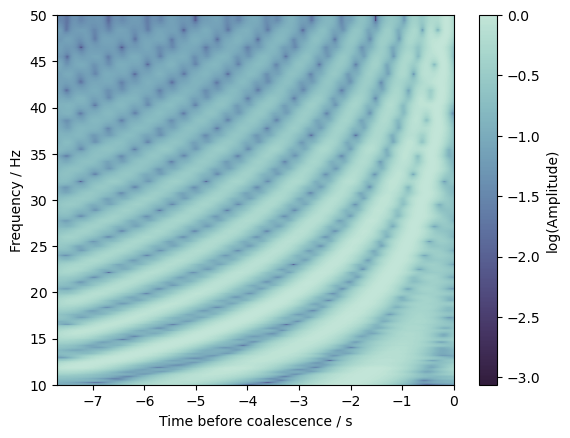

In [7]:
# Make qtransform plot
cmap = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
plt.pcolormesh(h_q_times, h_q_freqs, np.log10(h_q_amp), cmap=cmap)
plt.colorbar(label='log(Amplitude)')

# Plot formatting
plt.ylim(10,50)
plt.xlim(h.sample_times[0], 0)
plt.xlabel('Time before coalescence / s')
plt.ylabel('Frequency / Hz')

In [11]:
from pycbc.waveform import td_approximants
for approx in td_approximants():
    if 'SEOBNR' in approx:
        print(approx)

SEOBNRv1
SEOBNRv2
SEOBNRv2_opt
SEOBNRv3
SEOBNRv3_pert
SEOBNRv3_opt
SEOBNRv3_opt_rk4
SEOBNRv4
SEOBNRv4_opt
SEOBNRv4P
SEOBNRv4PHM
SEOBNRv2T
SEOBNRv4T
SEOBNRv4_ROM_NRTidalv2
SEOBNRv4_ROM_NRTidalv2_NSBH
SEOBNRv4HM
SEOBNRv4HM_PA
pSEOBNRv4HM_PA
SEOBNRv1_ROM_EffectiveSpin
SEOBNRv1_ROM_DoubleSpin
SEOBNRv2_ROM_EffectiveSpin
SEOBNRv2_ROM_DoubleSpin
SEOBNRv2_ROM_DoubleSpin_HI
SEOBNRv4_ROM
SEOBNRv4HM_ROM
SEOBNRv5_ROM
